Importing the necessary Python libraries

# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from pydot import graph_from_dot_data
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import VotingClassifier

In [3]:
from xgboost import XGBClassifier
from vecstack import stacking
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import brier_score_loss

# Data Loading

In [4]:
train = pd.read_csv("cs-training.csv", index_col = 0)
test = pd.read_csv("cs-test.csv", index_col = 0)

In [5]:
print(train.head())

   SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
1                 1                              0.766127   45   
2                 0                              0.957151   40   
3                 0                              0.658180   38   
4                 0                              0.233810   30   
5                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
1                                     2   0.802982         9120.0   
2                                     0   0.121876         2600.0   
3                                     1   0.085113         3042.0   
4                                     0   0.036050         3300.0   
5                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
1                               13                        0   
2                                4                        0   

In [6]:
print(test.head())

   SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
1               NaN                              0.885519   43   
2               NaN                              0.463295   57   
3               NaN                              0.043275   59   
4               NaN                              0.280308   38   
5               NaN                              1.000000   27   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
1                                     0   0.177513         5700.0   
2                                     0   0.527237         9141.0   
3                                     0   0.687648         5083.0   
4                                     1   0.925961         3200.0   
5                                     0   0.019917         3865.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
1                                4                        0   
2                               15                        0   

In [7]:
summary_df = train.describe()
print(summary_df)

       SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines            age  \
count     150000.000000                         150000.000000  150000.000000   
mean           0.066840                              6.048438      52.295207   
std            0.249746                            249.755371      14.771866   
min            0.000000                              0.000000       0.000000   
25%            0.000000                              0.029867      41.000000   
50%            0.000000                              0.154181      52.000000   
75%            0.000000                              0.559046      63.000000   
max            1.000000                          50708.000000     109.000000   

       NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  MonthlyIncome  \
count                         150000.000000  150000.000000   1.202690e+05   
mean                               0.421033     353.005076   6.670221e+03   
std                                4.192781    2

In [8]:
#print structure of data
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB
None


In [9]:
print(train.dtypes)

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object


# Data Description

# Data Understanding

# Plan of Attack

# Data Cleansing

### Remove Whitespace

In [10]:
#strip whitespace from entire data frame
train = train.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [11]:
print(train.head())

   SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
1                 1                              0.766127   45   
2                 0                              0.957151   40   
3                 0                              0.658180   38   
4                 0                              0.233810   30   
5                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
1                                     2   0.802982         9120.0   
2                                     0   0.121876         2600.0   
3                                     1   0.085113         3042.0   
4                                     0   0.036050         3300.0   
5                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
1                               13                        0   
2                                4                        0   

### NA Values

Replace with central tendency metric

In [12]:
#are the any NA values?
train.isnull().values.any()

True

In [13]:
#which columns have missing values
train.isnull().sum()[train.isnull().sum()>0]

MonthlyIncome         29731
NumberOfDependents     3924
dtype: int64

As you can see, there are missing values in only two features: MonthlyIncomeand NumberOfDependents

In [14]:
#what percentage of records are missing
train.isnull().sum()[train.isnull().sum()>0]/len(train)

MonthlyIncome         0.198207
NumberOfDependents    0.026160
dtype: float64

MonthlyIncome has nearly 20% of it's data as missing. This is quote high and brings us to a decision point. We can drop this column entirely, drop the rows containing missing values, or impute the missing values. SimpleImputation may be subject to error since it would be applying a central tendency value to all 29731 of these rows; however, imputation is important since Machine Learning algorithms don't like missing values. We can also impute using a sophisticated, predictive method. 

From subject matter context, we know that monthly income is a feature important in our dataset and will elect to keep it. Therefore, we will be doing imputation for these missing values. 

In [15]:
train_full = train.copy()

In [16]:
income_median = train_full['MonthlyIncome'].median()

#REMEMBER TO TRY ITERATIVE IMPUTER

#### DO WE NEED TO TAKE MEDIAN FROM NON NA ROWS ONLY?

In [17]:
income_median

5400.0

In [18]:
train_full['MonthlyIncome'].fillna(income_median, inplace=True)

In [19]:
train_full['MonthlyIncome'].isnull().sum()

0

No more missing values in Monthly Income! Now NumberOfDependents

In [20]:
dependents_median = train_full['NumberOfDependents'].median()

In [21]:
train_full['NumberOfDependents'].fillna(dependents_median, inplace = True)

In [22]:
train_full['NumberOfDependents'].isnull().sum()

0

No more missing values in NumberOfDependents! Now onto Outliers.

### Outlier Values

C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


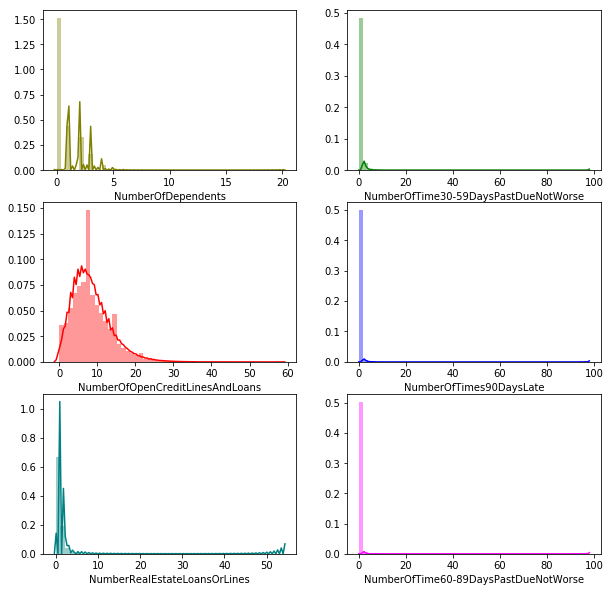

In [23]:
#check outliers
df = train_full
f, axes = plt.subplots(3, 2, figsize=(10, 10), sharex=False)
sns.distplot( df["NumberOfDependents"] , color="olive", ax=axes[0, 0])
sns.distplot( df["NumberOfTime30-59DaysPastDueNotWorse"] , color="green", ax=axes[0, 1])
sns.distplot( df["NumberOfOpenCreditLinesAndLoans"] , color="red", ax=axes[1, 0])
sns.distplot( df["NumberOfTimes90DaysLate"] , color="blue", ax=axes[1, 1])
sns.distplot( df["NumberRealEstateLoansOrLines"] , color="teal", ax=axes[2, 0])
sns.distplot( df["NumberOfTime60-89DaysPastDueNotWorse"] , color="magenta", ax=axes[2, 1])

As we can see by a subset of 6 variables, they are almost all largely skewed to the right, meaning that there are many outliers present in the data. We will now remove rows containing an outlier in any of the variables. 

In [24]:
#before: summarize the number of rows and columns in the dataset
print(df.shape)

(150000, 11)


In [25]:
zscore = np.abs(stats.zscore(df.iloc[:,1:11]))
print(zscore)
threshold = 3

[[0.02115001 0.49385982 0.37659296 ... 4.40954554 0.05785249 1.14052977]
 [0.02038516 0.83234222 0.10041896 ... 0.90128301 0.05785249 0.23720186]
 [0.02158222 0.96773518 0.138087   ... 0.90128301 0.05785249 0.66612604]
 ...
 [0.02323239 0.38619443 0.10041896 ... 0.01614492 0.05785249 0.66612604]
 [0.02421753 1.50930703 0.10041896 ... 0.90128301 0.05785249 0.66612604]
 [0.02081306 0.79237332 0.10041896 ... 0.86899317 0.05785249 0.66612604]]


In [26]:
#show indexes of outliers
print(np.where(zscore >3))

(array([     0,      4,     44, ..., 149899, 149916, 149968], dtype=int64), array([7, 4, 5, ..., 9, 5, 9], dtype=int64))


In [27]:
print(zscore[0][7])

4.409545538528969


Let's rcount outliers as anythign greater than 2.5 zscores from the mean, as this is a common rule of thumb.

In [28]:
df_full = df
df_full = df_full[(zscore < 2.5).all(axis=1)]
print(df_full.shape)

(137774, 11)


In [29]:
print(df_full['SeriousDlqin2yrs'].describe())

count    137774.000000
mean          0.064076
std           0.244889
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: SeriousDlqin2yrs, dtype: float64


It looks like 12,226‬‬ outlier rows were removed. Let's see if this improves our histograms a bit.

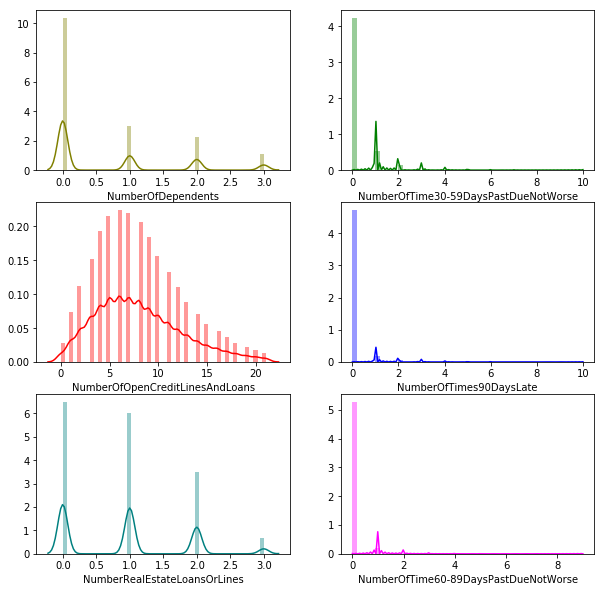

In [30]:
f, axes = plt.subplots(3, 2, figsize=(10, 10), sharex=False)
sns.distplot( df_full["NumberOfDependents"] , color="olive", ax=axes[0, 0])
sns.distplot( df_full["NumberOfTime30-59DaysPastDueNotWorse"] , color="green", ax=axes[0, 1])
sns.distplot( df_full["NumberOfOpenCreditLinesAndLoans"] , color="red", ax=axes[1, 0])
sns.distplot( df_full["NumberOfTimes90DaysLate"] , color="blue", ax=axes[1, 1])
sns.distplot( df_full["NumberRealEstateLoansOrLines"] , color="teal", ax=axes[2, 0])
sns.distplot( df_full["NumberOfTime60-89DaysPastDueNotWorse"] , color="magenta", ax=axes[2, 1])

There is certainly improvement! We will need to apply transforms to ensure normal distributions for regression. It is perfectly okay that the distributions are still skewed, now the outlier values have just been removed.

Now we have a dataset void of outliers and missing values - let's move onto visualizations and more preprocessing. 

# Exploratory Data Visualizations

# Data Standardization/Normalization

Some algorithms, such as Neural Networks, require data to be consolidated into a standard range, such as 0-1. I will create a standard range dataset using min/max normalization.

In [31]:
scaler = MinMaxScaler()

scaled_df = scaler.fit_transform(df_full)
scaled_df = pd.DataFrame(scaled_df, columns=['SeriousDlqin2yrs','RevolvingUtilizationOfUnsecuredLines','age','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents'])

C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [32]:
scaled_df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.0,0.001554,0.279412,0.0,2.237903e-05,0.067387,0.190476,0.0,0.000000,0.000000,0.333333
1,0.0,0.001068,0.250000,0.1,1.562860e-05,0.078843,0.095238,0.1,0.000000,0.000000,0.000000
2,0.0,0.000380,0.132353,0.0,6.619479e-06,0.085530,0.238095,0.0,0.000000,0.000000,0.000000
3,0.0,0.000346,0.779412,0.0,6.896933e-05,0.090714,0.142857,0.0,0.333333,0.000000,0.333333
4,0.0,0.001225,0.264706,0.0,3.854940e-05,0.090714,0.380952,0.0,0.000000,0.000000,0.000000
5,0.0,0.000190,0.088235,0.0,8.446566e-03,0.139958,0.095238,0.0,0.000000,0.000000,0.000000
6,0.0,0.001046,0.132353,0.0,5.682633e-05,0.064795,0.238095,0.0,0.000000,0.000000,0.000000
7,0.0,0.000031,0.441176,0.0,9.759985e-05,0.168494,0.333333,0.0,0.666667,0.000000,0.666667
8,0.0,0.000017,0.367647,0.0,5.478408e-05,0.322785,0.619048,0.0,0.666667,0.000000,0.666667
9,1.0,0.001566,0.279412,0.3,7.032037e-05,0.355079,0.428571,0.3,0.333333,0.111111,0.666667


C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


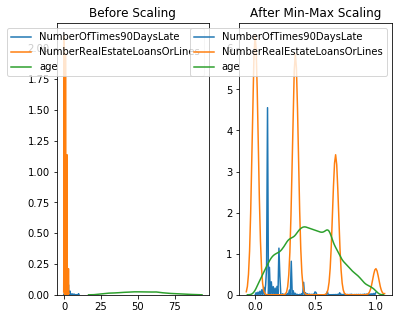

In [33]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(df_full['NumberOfTimes90DaysLate'], ax=ax1)
sns.kdeplot(df_full['NumberRealEstateLoansOrLines'], ax=ax1)
sns.kdeplot(df_full['age'], ax=ax1)
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(scaled_df['NumberOfTimes90DaysLate'], ax=ax2)
sns.kdeplot(scaled_df['NumberRealEstateLoansOrLines'], ax=ax2)
sns.kdeplot(scaled_df['age'], ax=ax2)
plt.show()

Now all data points are scaled to the 0-1 range!

Some algorithms, such as Regression, require data to be normally distributed. I will create this by applying various transforms to the features such as log, square root, or cube root.

In [34]:
df_full2 = df_full[['RevolvingUtilizationOfUnsecuredLines','age','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']]
bc = PowerTransformer(method='box-cox', standardize=False)
yj = PowerTransformer(method='yeo-johnson', standardize=False)

In [35]:
norm_df = yj.fit_transform(df_full2)
norm_df = pd.DataFrame(norm_df, columns=['RevolvingUtilizationOfUnsecuredLines','age','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents'])

In [36]:
norm_df = pd.merge(df_full[['SeriousDlqin2yrs']], norm_df, left_index=True, right_index= True)

In [37]:
norm_df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,126554.000000,126554.000000,126554.000000,126554.000000,126554.000000,126554.000000,126554.000000,126554.000000,126554.000000,126554.000000,126554.000000
mean,0.063672,0.149191,20.878914,0.021390,0.480863,131.322010,3.772855,0.002720,0.521446,0.001924,0.171368
std,0.244169,0.126052,4.359937,0.049982,0.508651,40.933351,1.493157,0.011299,0.450670,0.008488,0.221967
min,0.000000,-0.000000,10.792723,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000
25%,0.000000,0.027714,17.682764,-0.000000,0.148763,110.449542,2.884606,-0.000000,-0.000000,-0.000000,-0.000000
50%,0.000000,0.118520,21.016471,-0.000000,0.276712,131.362228,3.635404,-0.000000,0.679993,-0.000000,-0.000000
75%,0.000000,0.275014,24.141101,-0.000000,0.504286,149.861315,4.892751,-0.000000,0.679993,-0.000000,0.402234
max,1.000000,0.425704,30.933683,0.138831,1.492729,344.361404,7.312339,0.049660,1.334339,0.039379,0.522334


C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


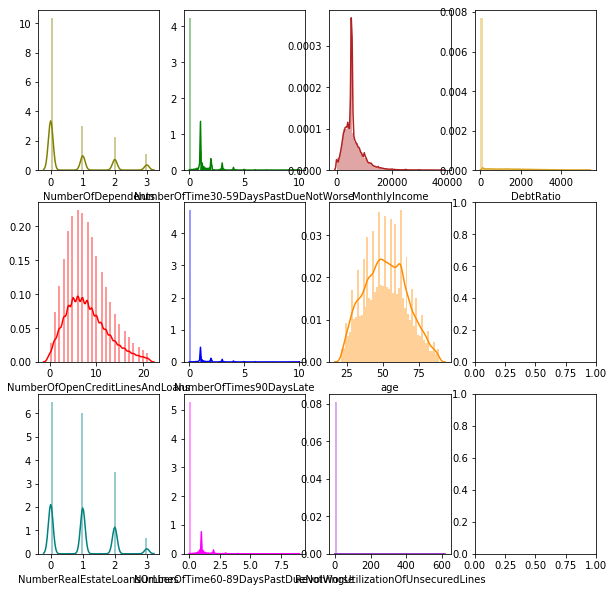

In [38]:
f, axes = plt.subplots(3, 4, figsize=(10, 10), sharex=False)
sns.distplot( df_full2["NumberOfDependents"] , color="olive", ax=axes[0, 0])
sns.distplot( df_full2["NumberOfTime30-59DaysPastDueNotWorse"] , color="green", ax=axes[0, 1])
sns.distplot( df_full2["NumberOfOpenCreditLinesAndLoans"] , color="red", ax=axes[1, 0])
sns.distplot( df_full2["NumberOfTimes90DaysLate"] , color="blue", ax=axes[1, 1])
sns.distplot( df_full2["NumberRealEstateLoansOrLines"] , color="teal", ax=axes[2, 0])
sns.distplot( df_full2["NumberOfTime60-89DaysPastDueNotWorse"] , color="magenta", ax=axes[2, 1])
sns.distplot( df_full2["MonthlyIncome"] , color="firebrick", ax=axes[0, 2])
sns.distplot( df_full2["age"] , color="darkorange", ax=axes[1, 2])
sns.distplot( df_full2["RevolvingUtilizationOfUnsecuredLines"] , color="darkorchid", ax=axes[2, 2])
sns.distplot( df_full2["DebtRatio"] , color="goldenrod", ax=axes[0, 3])

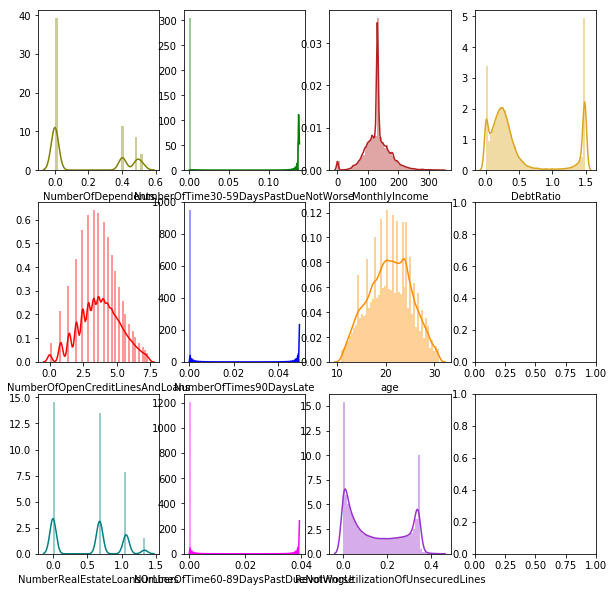

In [39]:
f, axes = plt.subplots(3, 4, figsize=(10, 10), sharex=False)
sns.distplot( norm_df["NumberOfDependents"] , color="olive", ax=axes[0, 0])
sns.distplot( norm_df["NumberOfTime30-59DaysPastDueNotWorse"] , color="green", ax=axes[0, 1])
sns.distplot( norm_df["NumberOfOpenCreditLinesAndLoans"] , color="red", ax=axes[1, 0])
sns.distplot( norm_df["NumberOfTimes90DaysLate"] , color="blue", ax=axes[1, 1])
sns.distplot( norm_df["NumberRealEstateLoansOrLines"] , color="teal", ax=axes[2, 0])
sns.distplot( norm_df["NumberOfTime60-89DaysPastDueNotWorse"] , color="magenta", ax=axes[2, 1])
sns.distplot( norm_df["MonthlyIncome"] , color="firebrick", ax=axes[0, 2])
sns.distplot( norm_df["age"] , color="darkorange", ax=axes[1, 2])
sns.distplot( norm_df["RevolvingUtilizationOfUnsecuredLines"] , color="darkorchid", ax=axes[2, 2])
sns.distplot( norm_df["DebtRatio"] , color="goldenrod", ax=axes[0, 3])

As you can see, the yeo-johnson transform did imporve the data's normal distribution.

# Train/Validate Split

In [40]:
columns=(['RevolvingUtilizationOfUnsecuredLines','age','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents'])
full_train_cols = pd.DataFrame(df_full, columns = columns)
full_train_target = pd.DataFrame(df_full['SeriousDlqin2yrs'])
#full, unscaled dataset split
fullxTrain, fullxTest, fullyTrain, fullyTest = train_test_split(full_train_cols, full_train_target, test_size = 0.2)

In [41]:
scaled_train_cols = pd.DataFrame(scaled_df, columns = columns)
scaled_train_target = pd.DataFrame(scaled_df['SeriousDlqin2yrs'])
#scaled dataset split
scaledxTrain, scaledxTest, scaledyTrain, scaledyTest = train_test_split(scaled_train_cols, scaled_train_target, test_size = 0.2)

In [42]:
norm_train_cols = pd.DataFrame(norm_df, columns = columns)
norm_train_target = pd.DataFrame(norm_df['SeriousDlqin2yrs'])
#normal distributed dataset split
normxTrain, normxTest, normyTrain, normyTest = train_test_split(norm_train_cols, norm_train_target, test_size = 0.2)

In [43]:
print(fullxTrain.shape, fullyTrain.shape)
print(fullxTest.shape, fullyTest.shape)

(110219, 10) (110219, 1)
(27555, 10) (27555, 1)


In [44]:
print(scaledxTrain.shape, scaledyTrain.shape)
print(scaledxTest.shape, scaledyTest.shape)

(110219, 10) (110219, 1)
(27555, 10) (27555, 1)


In [45]:
print(normxTrain.shape, normyTrain.shape)
print(normxTest.shape, normyTest.shape)

(101243, 10) (101243, 1)
(25311, 10) (25311, 1)


In [46]:
print(fullxTrain.describe(), fullyTrain.describe())

       RevolvingUtilizationOfUnsecuredLines            age  \
count                         110219.000000  110219.000000   
mean                               0.378950      52.181475   
std                                4.655471      14.798608   
min                                0.000000      21.000000   
25%                                0.029062      41.000000   
50%                                0.149497      52.000000   
75%                                0.559088      63.000000   
max                              601.000000      89.000000   

       NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  MonthlyIncome  \
count                         110219.000000  110219.000000  110219.000000   
mean                               0.239587     286.376320    5950.949446   
std                                0.684822     815.801351    3725.278046   
min                                0.000000       0.000000       0.000000   
25%                                0.000000       0.1690

In [47]:
#print results
print(fullxTest.describe(), fullyTest.describe())

       RevolvingUtilizationOfUnsecuredLines           age  \
count                          27555.000000  27555.000000   
mean                               0.419777     52.186028   
std                                6.445365     14.739753   
min                                0.000000     21.000000   
25%                                0.029130     41.000000   
50%                                0.149147     52.000000   
75%                                0.550285     63.000000   
max                              616.000000     89.000000   

       NumberOfTime30-59DaysPastDueNotWorse     DebtRatio  MonthlyIncome  \
count                          27555.000000  27555.000000   27555.000000   
mean                               0.229396    285.190482    5946.795645   
std                                0.656539    804.264658    3735.509158   
min                                0.000000      0.000000       0.000000   
25%                                0.000000      0.171509    3800.0000

In [48]:
print(scaledxTrain.describe(), scaledyTrain.describe())
#print results
print(scaledxTest.describe(), scaledyTest.describe())

       RevolvingUtilizationOfUnsecuredLines            age  \
count                         110219.000000  110219.000000   
mean                               0.000650       0.458287   
std                                0.009154       0.217173   
min                                0.000000       0.000000   
25%                                0.000047       0.294118   
50%                                0.000241       0.455882   
75%                                0.000903       0.617647   
max                                1.000000       1.000000   

       NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  MonthlyIncome  \
count                         110219.000000  110219.000000  110219.000000   
mean                               0.023798       0.052970       0.154367   
std                                0.068146       0.150115       0.096669   
min                                0.000000       0.000000       0.000000   
25%                                0.000000       0.0000

In [49]:
print(normxTrain.describe(), normyTrain.describe())
#print results
print(normxTest.describe(), normyTest.describe())

       RevolvingUtilizationOfUnsecuredLines            age  \
count                         101243.000000  101243.000000   
mean                               0.149438      20.881167   
std                                0.126082       4.364702   
min                               -0.000000      10.792723   
25%                                0.027818      17.682764   
50%                                0.119457      21.016471   
75%                                0.275263      24.141101   
max                                0.425704      30.933683   

       NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  MonthlyIncome  \
count                         101243.000000  101243.000000  101243.000000   
mean                               0.021529       0.480452     131.320238   
std                                0.050113       0.508506      40.954939   
min                               -0.000000      -0.000000       0.000000   
25%                               -0.000000       0.1486

# Logistic Regression

### Multi-collinearity analysis

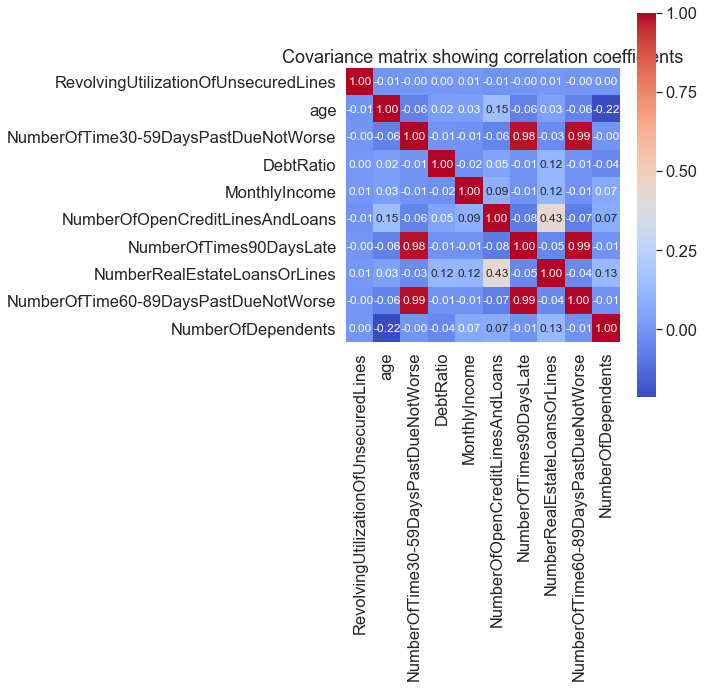

In [50]:
stdsc = StandardScaler() 
X_std = stdsc.fit_transform(df[columns].iloc[:,range(0,10)].values)
cov_mat =np.cov(X_std.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 cmap='coolwarm',                 
                 yticklabels=columns,
                 xticklabels=columns)
plt.title('Covariance matrix showing correlation coefficients', size = 18)
plt.tight_layout()
plt.show()

C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in r

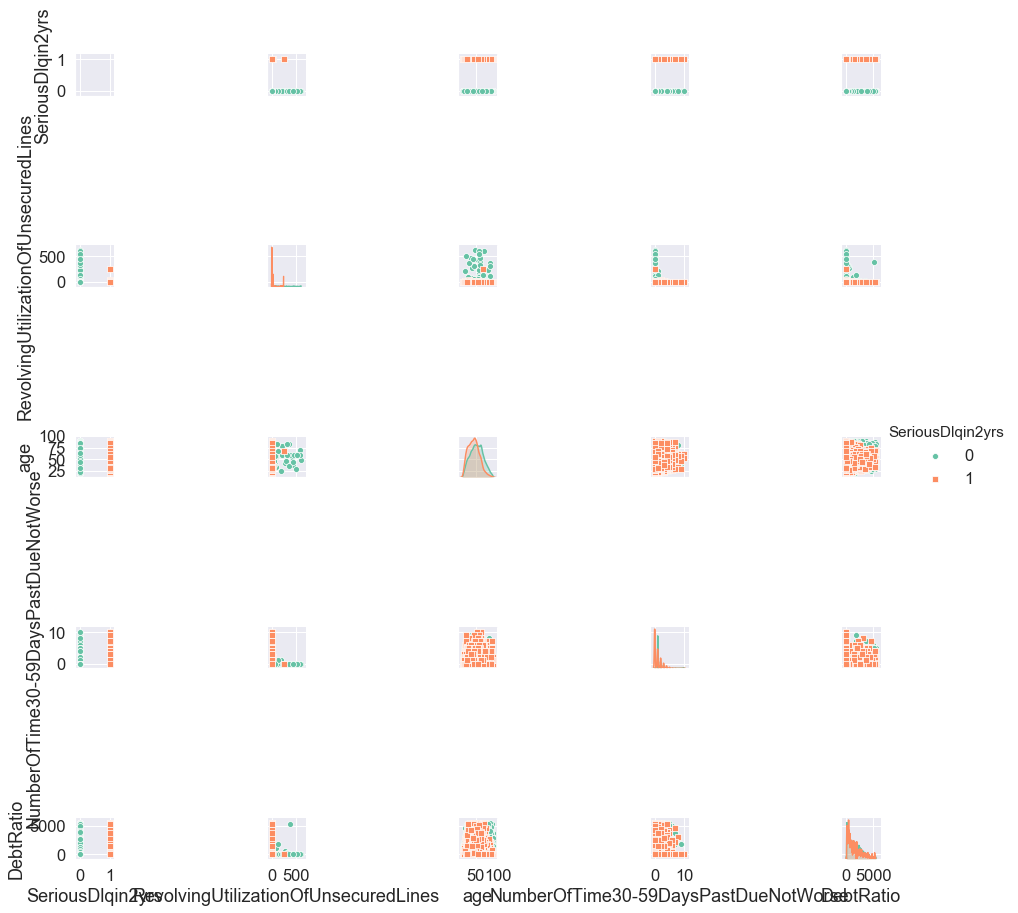

In [51]:
sns.pairplot(df_full.iloc[:,0:5], kind="scatter", hue="SeriousDlqin2yrs", markers=["o", "s"], palette="Set2")

C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


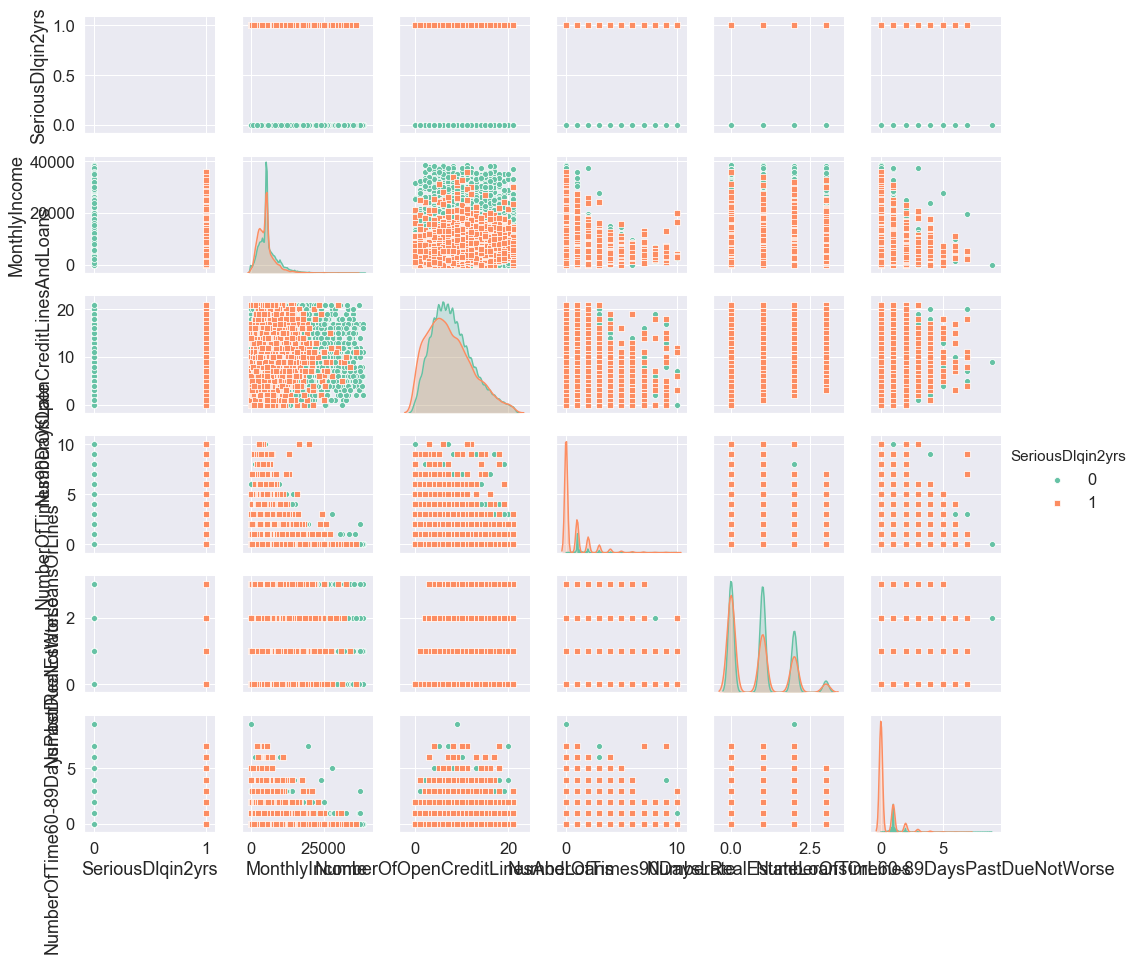

In [52]:
r = np.r_[0, 5:10]
sns.pairplot(df_full.iloc[:,r], kind="scatter", hue="SeriousDlqin2yrs", markers=["o", "s"], palette="Set2")

In [53]:
normyTrain['SeriousDlqin2yrs'].value_counts()

0    94798
1     6445
Name: SeriousDlqin2yrs, dtype: int64

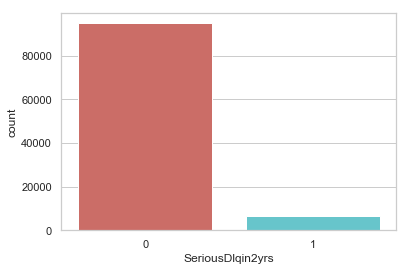

In [54]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x='SeriousDlqin2yrs', data=normyTrain, palette ='hls')
plt.show()

Dataset is largely non-defaulted loans, but hopefully we can draw some strong conclusions/patterns from the 6457 defaulted loans ("1").

In [55]:
count_default = len(normyTrain[normyTrain['SeriousDlqin2yrs']==1])
count_no_default = len(normyTrain[normyTrain['SeriousDlqin2yrs']==0])
pct_of_default = count_default/(count_default+count_no_default)
print("percentage of default", pct_of_default*100)
pct_of_no_default = count_no_default/(count_default+count_no_default)
print("percentage of no default", pct_of_no_default*100)

percentage of default 6.365872208448979
percentage of no default 93.63412779155102


In [56]:
norm_df.groupby('SeriousDlqin2yrs').mean()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,,,,,,,,,,
0,0.149296,20.878136,0.021434,0.481345,131.319332,3.772140,0.002724,0.521312,0.001931,0.171347
1,0.147644,20.890359,0.020734,0.473772,131.361394,3.783361,0.002656,0.523415,0.001808,0.171686


In [57]:
logreg = LogisticRegression()

In [58]:
rfe = RFE(logreg, 20)
rfe = rfe.fit(normxTrain, normyTrain.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[ True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1]


Looks like every variable is considered a strong predictor, according to Recursive Feature Elimination (RFE).

In [59]:
cols2 = ['RevolvingUtilizationOfUnsecuredLines','age','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']
X = normxTrain[cols2]
y = normyTrain['SeriousDlqin2yrs']

In [60]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.242164
         Iterations 7
                                   Results: Logit
Model:                      Logit                  Pseudo R-squared:       -0.022    
Dependent Variable:         SeriousDlqin2yrs       AIC:                    49050.8791
Date:                       2019-12-09 22:02       BIC:                    49127.0813
No. Observations:           101243                 Log-Likelihood:         -24517.   
Df Model:                   7                      LL-Null:                -23986.   
Df Residuals:               101235                 LLR p-value:            1.0000    
Converged:                  1.0000                 Scale:                  1.0000    
No. Iterations:             7.0000                                                   
-------------------------------------------------------------------------------------
                                      Coef.  Std.Err.    z     P>|z|   [0.

In [61]:
logreg.fit(normxTrain,normyTrain.values.ravel())

C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [62]:
y_pred_lr = logreg.predict(normxTest)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(normxTest, normyTest)))

Accuracy of logistic regression classifier on test set: 0.94


In [63]:
confusion_matrix_lr = confusion_matrix(normyTest, y_pred_lr)
print(confusion_matrix_lr)

[[23698     0]
 [ 1613     0]]


# Decision Tree

In [64]:
dt_model = tree.DecisionTreeClassifier()
dt_model2 = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

In [65]:
dt = dt_model.fit(fullxTrain,fullyTrain)
dt2 = dt_model2.fit(fullxTrain,fullyTrain)

Try to visualize decision tree

In [66]:
y_pred2 = dt_model2.predict(fullxTest)

In [67]:
print('Accuracy:',dt_model2.score(fullxTest,fullyTest))

Accuracy: 0.9376156777354382


In [68]:
pd.DataFrame(
    confusion_matrix(fullyTest, y_pred2),
    columns=['Predicted Not Default', 'Predicted Default'],
    index=['True Not Default', 'True Default']
)

,Predicted Not Default,Predicted Default
True Not Default,25669,104
True Default,1615,167


We had more false negatives than false positives, which is not ideal.

# Random Forest

In [69]:
rf = RandomForestClassifier(criterion='entropy', oob_score=True, random_state=1)

In [70]:
rf_model = rf.fit(fullxTrain, fullyTrain)

C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k

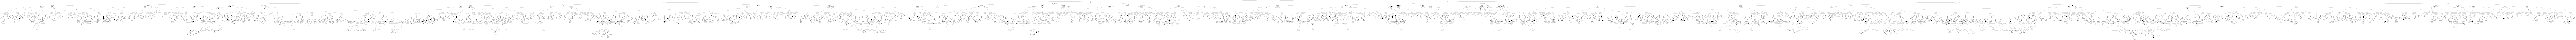

In [71]:
dtree = rf.estimators_[0]
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=columns)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [72]:
rf.oob_score_

0.9298669013509467

In [73]:
print('Accuracy:',rf_model.score(fullxTest,fullyTest))

Accuracy: 0.9353293413173652


In [74]:
y_pred3 = rf.predict(fullxTest)

pd.DataFrame(
    confusion_matrix(fullyTest, y_pred3),
    columns=['Predicted Not Default', 'Predicted Default'],
    index=['True Not Default', 'True Default']
)

,Predicted Not Default,Predicted Default
True Not Default,25494,279
True Default,1503,279


# Support Vector Machines (SVM)

# Artificial Neural Networks (ANN)

In [75]:
ann = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
ann.fit(scaledxTrain, scaledyTrain.values.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [76]:
predictions2 = ann.predict(scaledxTest)

In [77]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(scaledyTest,predictions2))
print(classification_report(scaledyTest,predictions2))

[[25577   206]
 [ 1490   282]]
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97     25783
         1.0       0.58      0.16      0.25      1772

   micro avg       0.94      0.94      0.94     27555
   macro avg       0.76      0.58      0.61     27555
weighted avg       0.92      0.94      0.92     27555



In [78]:
print('Accuracy:',ann.score(scaledxTest,scaledyTest))

Accuracy: 0.9384503719833062


In [79]:
y_pred4 = ann.predict(scaledxTest)

pd.DataFrame(
    confusion_matrix(scaledyTest, y_pred4),
    columns=['Predicted Not Default', 'Predicted Default'],
    index=['True Not Default', 'True Default']
)

,Predicted Not Default,Predicted Default
True Not Default,25577,206
True Default,1490,282


# k-Nearest Neighbors (k-NN)

# Stacked Ensemble Model

In [80]:
models = [logreg, dt_model2, rf, ann]

In [81]:
S_train, S_test = stacking(models,                   
                           fullxTrain, fullyTrain, fullxTest,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=5, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [4]

model  0:     [LogisticRegression]


C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    fold  0:  [0.93944205]


C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    fold  1:  [0.93825984]


C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    fold  2:  [0.93803302]


C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    fold  3:  [0.93821168]


C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    fold  4:  [0.93993558]
    ----
    MEAN:     [0.93877644] + [0.00076487]
    FULL:     [0.93877644]

model  1:     [DecisionTreeClassifier]
    fold  0:  [0.93876162]
    fold  1:  [0.93780621]
    fold  2:  [0.93844130]
    fold  3:  [0.93775802]
    fold  4:  [0.93943656]
    ----
    MEAN:     [0.93844074] + [0.00062664]
    FULL:     [0.93844074]

model  2:     [RandomForestClassifier]


C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


    fold  0:  [0.93658426]


C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


    fold  1:  [0.93562874]


C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


    fold  2:  [0.93576483]


C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


    fold  3:  [0.93553509]


C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


    fold  4:  [0.93626094]
    ----
    MEAN:     [0.93595477] + [0.00040212]
    FULL:     [0.93595478]

model  3:     [MLPClassifier]
    fold  0:  [0.93930597]
    fold  1:  [0.93762475]
    fold  2:  [0.93617311]
    fold  3:  [0.93694143]
    fold  4:  [0.93762192]
    ----
    MEAN:     [0.93753344] + [0.00103528]
    FULL:     [0.93753346]



In [82]:
ensemble_model = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                      n_estimators=100, max_depth=3)
    
ensemble_model = ensemble_model.fit(S_train, fullyTrain)
y_pred_ensemble = ensemble_model.predict(S_test)
print('Final prediction score: [%.8f]' % accuracy_score(fullyTest, y_pred_ensemble))

C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Final prediction score: [0.93906732]


In [83]:
model_ens = VotingClassifier(estimators=[('lr', logreg), ('dt', dt_model2), ('rf', rf), ('ann', ann) ], voting='soft')
model_ens.fit(fullxTrain,fullyTrain)
model_ens.score(fullxTest,fullyTest)

C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were

0.9386681183088369

Can we ensemble on the same dataset? Or does it have to be scaled??????

In [146]:
from xgboost import XGBClassifier

# train XGBoost model with default parameters
XG_model = XGBClassifier()
XG_model.fit(scaledxTrain, scaledyTrain, verbose=False)

# and save our model
XG_model.save_model("xgboost_baseline.model")

C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [150]:
import h2o
from h2o.automl import H2OAutoML

# initilaize an H20 instance running locally
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (build 25.152-b12, mixed mode)56-b12)
  Starting server from C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\alexb\AppData\Local\Temp\tmpiwj3tj2j
  JVM stdout: C:\Users\alexb\AppData\Local\Temp\tmpiwj3tj2j\h2o_alexb_started_from_python.out
  JVM stderr: C:\Users\alexb\AppData\Local\Temp\tmpiwj3tj2j\h2o_alexb_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,05 secs
H2O cluster timezone:,America/Denver
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.9
H2O cluster version age:,1 month and 10 days
H2O cluster name:,H2O_from_python_alexb_6r6e1f
H2O cluster total nodes:,1
H2O cluster free memory:,3.499 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"accepting new members, healthy"


In [157]:
# convert our data to h20Frame, an alternative to pandas datatables
h2o_train_data = h2o.H2OFrame(scaledxTrain)
h2o_test_data = h2o.H2OFrame(scaledyTrain)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [158]:
h2o_test_data

SeriousDlqin2yrs
0
0
0
0
0
0
0
1
0
0


In [160]:
h2o_train_data = h2o_train_data.cbind(h2o_test_data)

# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=20, seed=1)
aml.train(y="SeriousDlqin2yrs", training_frame=h2o_train_data)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [161]:
# View the top five models from the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=5)

# The leader model can be access with `aml.leader`

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GLM_grid_1_AutoML_20191209_223242_model_1,8.55453e-10,2.92481e-05,8.55453e-10,1.93779e-05,2.47607e-05
StackedEnsemble_BestOfFamily_AutoML_20191209_223242,4.45861e-07,0.000667729,4.45861e-07,0.000272313,0.000517217
StackedEnsemble_AllModels_AutoML_20191209_223242,4.76955e-07,0.000690619,4.76955e-07,0.000282387,0.000552245
GBM_grid_1_AutoML_20191209_223242_model_1,2.85453e-06,0.00168954,2.85453e-06,0.000720705,0.00142795
GBM_1_AutoML_20191209_223242,3.60278e-06,0.0018981,3.60278e-06,0.000523108,0.00152291


In [164]:
# save the model out
h2o.save_model(aml.leader)

H2OResponseError: Server error water.exceptions.H2OIllegalArgumentException:
  Error: Illegal argument: dir of function: exportModel: water.api.FSIOException: FS IO Failure: 
 accessed path : file:/C:/Users/alexb/GitHub/Blockchain-Capstone/CAPSTONE/GLM_grid_1_AutoML_20191209_223242_model_1 msg: File already exists
  Request: GET /99/Models.bin/GLM_grid_1_AutoML_20191209_223242_model_1
    params: {'dir': 'C:\\Users\\alexb\\GitHub\\Blockchain-Capstone\\CAPSTONE\\GLM_grid_1_AutoML_20191209_223242_model_1', 'force': 'False'}


In [ ]:
h2o_model = h2o.load_model("../input/practical-model-evaluation-day-2/GBM_5_AutoML_20191205_060406")

# convert our data to h20Frame, an alternative to pandas datatables
# (required for h20 AutoMl)
train_data = h2o.H2OFrame(X_testing)
test_data = h2o.H2OFrame(list(y_testing))
test_data_h2o = train_data.cbind(test_data)

# Comparison of All Models

### Percentage of Correct Classification

###### Logistic Regression

In [84]:
print('Accuracy:',accuracy_score(normyTest, y_pred_lr))

Accuracy: 0.9362727667812414


In [85]:
pd.DataFrame(
    confusion_matrix(normyTest, y_pred_lr),
    columns=['Predicted Not Default', 'Predicted Default'],
    index=['True Not Default', 'True Default']
)

,Predicted Not Default,Predicted Default
True Not Default,23698,0
True Default,1613,0


###### Decision Tree

In [86]:
print('Accuracy:',accuracy_score(fullyTest, y_pred2))

Accuracy: 0.9376156777354382


In [87]:
pd.DataFrame(
    confusion_matrix(fullyTest, y_pred2),
    columns=['Predicted Not Default', 'Predicted Default'],
    index=['True Not Default', 'True Default']
)

,Predicted Not Default,Predicted Default
True Not Default,25669,104
True Default,1615,167


###### Random Forest

In [88]:
print('Accuracy:',accuracy_score(fullyTest, y_pred3))

Accuracy: 0.9353293413173652


In [89]:
pd.DataFrame(
    confusion_matrix(fullyTest, y_pred3),
    columns=['Predicted Not Default', 'Predicted Default'],
    index=['True Not Default', 'True Default']
)

,Predicted Not Default,Predicted Default
True Not Default,25494,279
True Default,1503,279


###### Support Vector Machines

###### Artificial Neural Networks

In [90]:
print('Accuracy:',accuracy_score(scaledyTest, y_pred4))

Accuracy: 0.9384503719833062


In [91]:
pd.DataFrame(
    confusion_matrix(scaledyTest, y_pred4),
    columns=['Predicted Not Default', 'Predicted Default'],
    index=['True Not Default', 'True Default']
)

,Predicted Not Default,Predicted Default
True Not Default,25577,206
True Default,1490,282


###### k-Nearest Neighbors

###### Ensemble Model

In [92]:
print('Accuracy:',accuracy_score(fullyTest, y_pred_ensemble))

Accuracy: 0.9390673199056433


In [93]:
pd.DataFrame(
    confusion_matrix(fullyTest, y_pred_ensemble),
    columns=['Predicted Not Default', 'Predicted Default'],
    index=['True Not Default', 'True Default']
)

,Predicted Not Default,Predicted Default
True Not Default,25649,124
True Default,1555,227


### Area Under ROC Curve

###### Logistic Regression

In [94]:
fpr_lr, tpr_lr, thresholds_lr = roc_curve(normyTest, y_pred_lr)

In [95]:
thresholds_lr

array([1, 0], dtype=int64)

In [96]:
fpr_lr

array([0., 1.])

In [97]:
tpr_lr

array([0., 1.])

In [98]:
auc_lr = roc_auc_score(normyTest, y_pred_lr)
print('AUC lr:%.3f'% auc_lr)

AUC lr:0.500


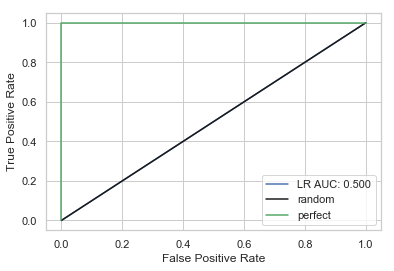

In [99]:
plt.plot(fpr_lr,tpr_lr,'b-', label= 'LR AUC: %.3f'%auc_lr)
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

###### Decision Tree

In [100]:
fpr_dt, tpr_dt, thresholds_dt = roc_curve(fullyTest, y_pred2)

In [101]:
thresholds_dt

array([2, 1, 0], dtype=int64)

In [102]:
fpr_dt

array([0.        , 0.00403523, 1.        ])

In [103]:
tpr_dt

array([0.        , 0.09371493, 1.        ])

In [104]:
auc_dt = roc_auc_score(fullyTest, y_pred2)
print('AUC dt:%.3f'% auc_dt)

AUC dt:0.545


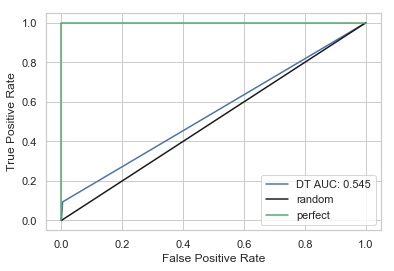

In [105]:
plt.plot(fpr_dt,tpr_dt,'b-', label= 'DT AUC: %.3f'%auc_dt)
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

###### Random Forest

In [106]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(fullyTest, y_pred3)

In [107]:
thresholds_rf

array([2, 1, 0], dtype=int64)

In [108]:
fpr_rf

array([0.        , 0.01082528, 1.        ])

In [109]:
tpr_rf

array([0.        , 0.15656566, 1.        ])

In [110]:
auc_rf = roc_auc_score(fullyTest, y_pred3)
print('AUC rf:%.3f'% auc_rf)

AUC rf:0.573


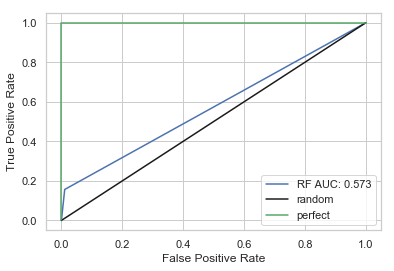

In [111]:
plt.plot(fpr_rf,tpr_rf,'b-', label= 'RF AUC: %.3f'%auc_rf)
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

###### Support Vector Machines

###### Artificial Neural Networks

In [112]:
fpr_ann, tpr_ann, thresholds_ann = roc_curve(scaledyTest, y_pred4)

In [113]:
thresholds_ann

array([2., 1., 0.])

In [114]:
fpr_ann

array([0.        , 0.00798976, 1.        ])

In [115]:
tpr_ann

array([0.        , 0.15914221, 1.        ])

In [116]:
auc_ann = roc_auc_score(scaledyTest, y_pred4)
print('AUC ann:%.3f'% auc_ann)

AUC ann:0.576


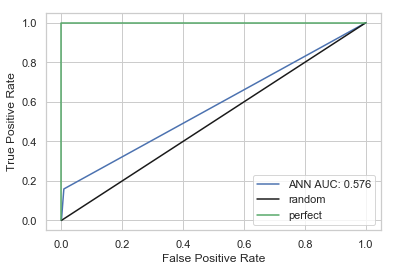

In [117]:
plt.plot(fpr_ann,tpr_ann,'b-', label= 'ANN AUC: %.3f'%auc_ann)
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

###### k-Nearest Neighbors

##### Ensemble Model

In [118]:
fpr_ens, tpr_ens, thresholds_ens = roc_curve(fullyTest, y_pred_ensemble)

In [119]:
thresholds_ens

array([2, 1, 0], dtype=int64)

In [120]:
fpr_ens

array([0.        , 0.00481124, 1.        ])

In [121]:
tpr_ens

array([0.        , 0.12738496, 1.        ])

In [122]:
auc_ens = roc_auc_score(fullyTest, y_pred_ensemble)
print('AUC ens:%.3f'% auc_ens)

AUC ens:0.561


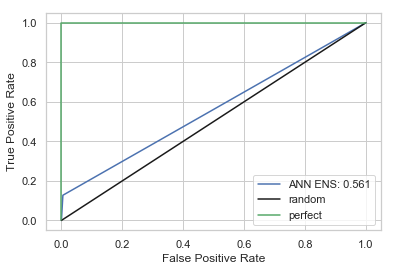

In [123]:
plt.plot(fpr_ens,tpr_ens,'b-', label= 'ANN ENS: %.3f'%auc_ens)
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

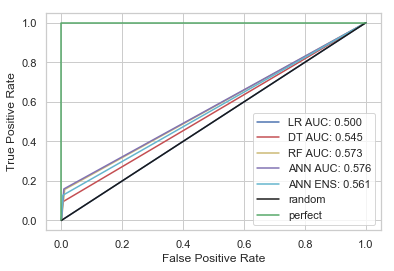

In [124]:
plt.plot(fpr_lr,tpr_lr,'b-', label= 'LR AUC: %.3f'%auc_lr)
plt.plot(fpr_dt,tpr_dt,'r-', label= 'DT AUC: %.3f'%auc_dt)
plt.plot(fpr_rf,tpr_rf,'y-', label= 'RF AUC: %.3f'%auc_rf)
plt.plot(fpr_ann,tpr_ann,'m-', label= 'ANN AUC: %.3f'%auc_ann)
plt.plot(fpr_ens,tpr_ens,'c-', label= 'ANN ENS: %.3f'%auc_ens)
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Brier's Score

###### Logistic Regression

In [125]:
# predict probabilities
probs = logreg.predict_proba(normxTest)
# keep the predictions for class 1 only
probs = probs[:, 1]
# calculate bier score
loss = brier_score_loss(normyTest, probs)
print(loss)

0.05967482571095072


###### Decision Tree

In [126]:
# predict probabilities
probs = dt_model2.predict_proba(fullxTest)
# keep the predictions for class 1 only
probs = probs[:, 1]
# calculate bier score
loss = brier_score_loss(fullyTest, probs)
print(loss)

0.05005841558723183


###### Random Forest

In [127]:
# predict probabilities
probs = rf.predict_proba(fullxTest)
# keep the predictions for class 1 only
probs = probs[:, 1]
# calculate bier score
loss = brier_score_loss(fullyTest, probs)
print(loss)

0.053880209303494665


###### Support Vector Machines

###### Artificial Neural Networks

In [128]:
# predict probabilities
probs = ann.predict_proba(fullxTest)
# keep the predictions for class 1 only
probs = probs[:, 1]
# calculate bier score
loss = brier_score_loss(scaledyTest, probs)
print(loss)

0.06430683898350827


###### k-Nearest Neighbors

##### Ensemble Model

In [129]:
# predict probabilities
probs = model_ens.predict_proba(fullxTest)
# keep the predictions for class 1 only
probs = probs[:, 1]
# calculate bier score
loss = brier_score_loss(fullyTest, probs)
print(loss)

0.04887066886537874


### Precision

###### Logistic Regression

In [130]:
precision_score(normyTest, y_pred_lr)

C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

###### Decision Tree

In [131]:
precision_score(fullyTest, y_pred2)

0.6162361623616236

###### Random Forest

In [132]:
precision_score(fullyTest, y_pred3)

0.5

###### Support Vector Machines

###### Artificial Neural Networks

In [133]:
precision_score(scaledyTest, y_pred4)

0.5778688524590164

###### k-Nearest Neighbors

##### Ensemble Model

In [134]:
precision_score(fullyTest, y_pred_ensemble)

0.6467236467236467

### Recall

###### Logistic Regression

In [135]:
recall_score(normyTest, y_pred_lr)

0.0

###### Decision Tree

In [136]:
recall_score(fullyTest, y_pred2)

0.09371492704826039

###### Random Forest

In [137]:
recall_score(fullyTest, y_pred3)

0.15656565656565657

###### Support Vector Machines

###### Artificial Neural Networks

In [138]:
recall_score(scaledyTest, y_pred4)

0.15914221218961624

###### k-Nearest Neighbors

##### Ensemble Model

In [139]:
recall_score(fullyTest, y_pred_ensemble)

0.12738496071829405

### F1 Score

###### Logistic Regression

In [140]:
f1_score(normyTest, y_pred_lr)

C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

###### Decision Tree

In [141]:
f1_score(fullyTest, y_pred2)

0.16268874817340478

###### Random Forest

In [142]:
f1_score(fullyTest, y_pred3)

0.23846153846153847

###### Support Vector Machines

###### Artificial Neural Networks

In [143]:
f1_score(scaledyTest, y_pred4)

0.2495575221238938

###### k-Nearest Neighbors

##### Ensemble Model

In [145]:
f1_score(fullyTest, y_pred_ensemble)

0.21284575714955462

# References

https://machinelearningmastery.com/how-to-score-probability-predictions-in-python/b

https://towardsdatascience.com/automate-stacking-in-python-fc3e7834772e

https://medium.com/datadriveninvestor/accuracy-trap-pay-attention-to-recall-precision-f-score-auc-d02f28d3299c

https://towardsdatascience.com/understanding-data-science-classification-metrics-in-scikit-learn-in-python-3bc336865019

https://medium.com/towards-artificial-intelligence/feature-selection-and-dimensionality-reduction-using-covariance-matrix-plot-b4c7498abd07

https://towardsdatascience.com/decision-tree-in-python-b433ae57fb93

https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5

https://www.kaggle.com/rtatman/practical-model-evaluation-day-2?utm_medium=email&utm_source=intercom&utm_campaign=automl-event